In [2]:
from IPython.display import Image

# RANDOM FOREST

- remote sensing - acc higher and training time is less
- object detection - provides better detection in complicated environments
- Kinect - tracks body movements and recreates it in game

CLASSIFICATION:
1. KNN
2. Naive Bayes
3. Decision Tree
4. Random Forest

WHY Random forest?

- no overfitting
- high accuracy
- estimates missing data - can maintain accuracy when a large proportion of data is missing

DEF: method that operates by constructing multiple decision Trees during training phase.

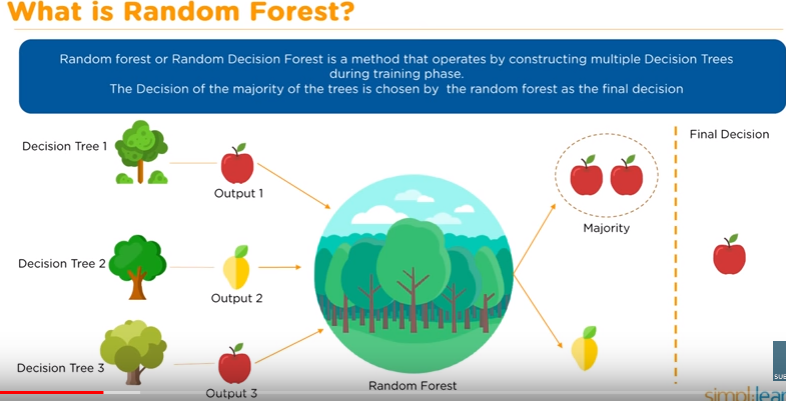

In [3]:
Image(filename='Pictures/M67.PNG', width=600, height=600)

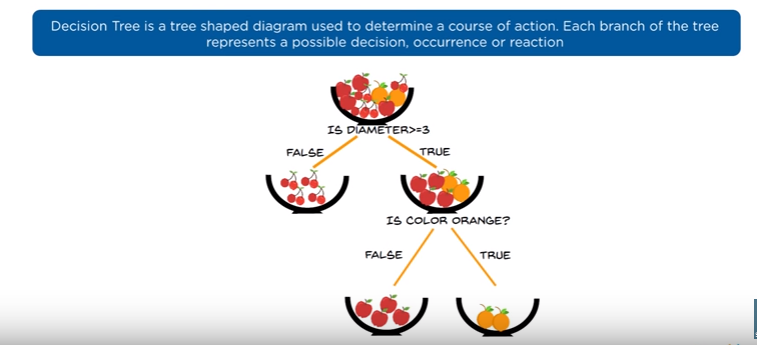

In [4]:
Image(filename='Pictures/M68.PNG', width=600, height=600)

ENTROPY

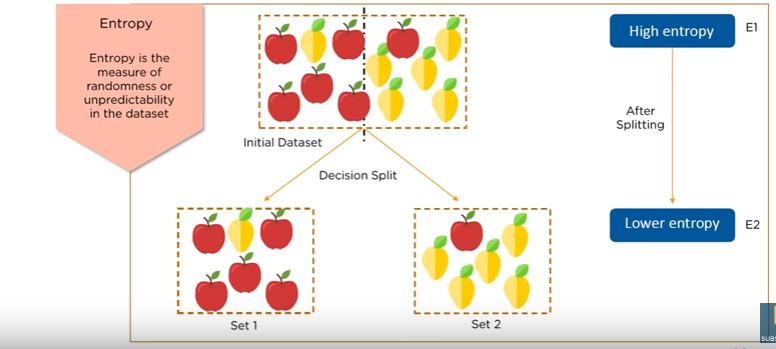

In [5]:
Image(filename='Pictures/M69.PNG', width=600, height=600)

INFORMATION GAIN

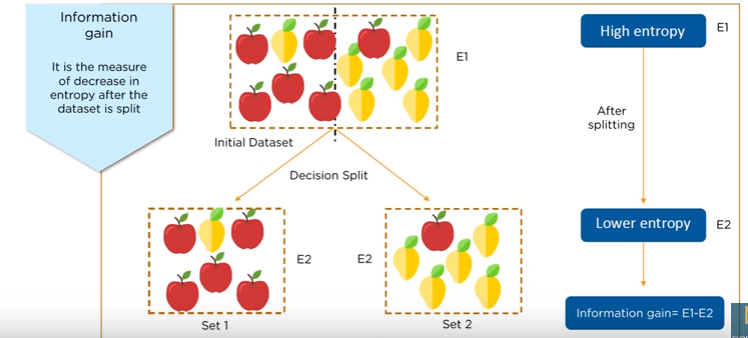

In [7]:
Image(filename='Pictures/M70.PNG', width=600, height=600)

LEAF NODE

DECISION NODE - has two or more branches

ROOT NODE - top most decision mode

example : 

bowl of fruit which are determined by color and diameter. We see that the condition diameter gives us the maximum gain and we will split data based on diameter

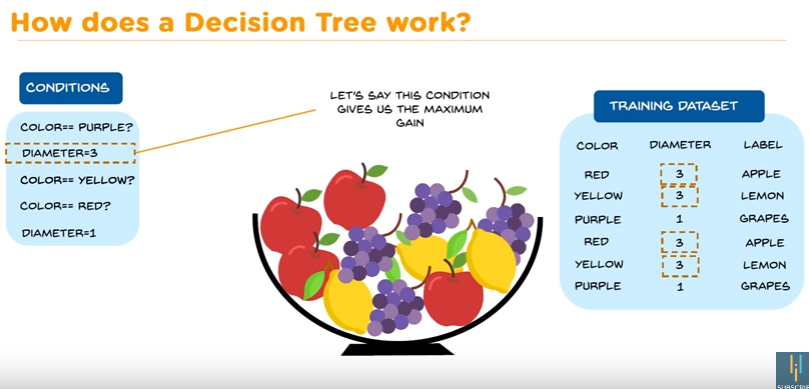

In [8]:
Image(filename='Pictures/M71.PNG', width=600, height=600)

Split:
1. bowl - grapes
2. bowl - lemon and apple

Further split - based on color!!!

AFTER THAT SPLIT ENTROPY IS 0!!

Case - Iris Flower analysis

In [13]:
#loading the Library with the iris dataset
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np # numbers python

#setting random seed
np.random.seed(0)

In [14]:
#load data
iris=load_iris()

In [19]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
# we can see data when we type print(iris) - where we can see that feature_names is the key to header
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
#adding new column for the species name
df['Species']=pd.Categorical.from_codes(iris.target,iris.target_names)
#we added another column when we can see species!! - y var
# iris.target is our data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
#creating test and train Data - another column!!
df['is_train']=np.random.uniform(0,1,len(df))<=.75
#we put train data in df - random.uniform (random number between 0 and 1 - 
#uniform means probability), each row gets generated number and if it's less or
#or equal to .75 true, else false - we are gonna take 75% data to train it, an another
# 25% data to test it
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [24]:
#creating df with test rows and training rows
train, test = df[df['is_train']==True], df[df['is_train']==False]
#creating two new variables - we decide whiich data is for train and which is for test!!

#show number of observatios for test and train
print('Number of observations - train data: ', len(train))
print('Number of observations - test data: ', len(test))

Number of observations - train data:  118
Number of observations - test data:  32


In [25]:
#create a list of the feature column's names
features=df.columns[:4] #first four of them are values
#wiew features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [27]:
#converting each sprecies name into digits - defining y variable
y= pd.factorize(train['Species'])[0]
# For each sprecies there is joined number - data can't be read in words
# we created whole column species - convert that to something that computer
# understand , [0] beacuse it's an araay
# factorize - there is only 3 of them - joined numbers 0,1,2!
# viewing y
y
# we see that we have 3 species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [33]:
#Preedicting
#Creating a Random forest Class
clf=RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=0)
#n_jobs changes the priority
#training classsifier
clf.fit(train[features],y)
# i added n_estimators=10 beacuse newer version will change that to 100

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
#apply the trained class to test
test[features]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
10,5.4,3.7,1.5,0.2
13,4.3,3.0,1.1,0.1
17,5.1,3.5,1.4,0.3
18,5.7,3.8,1.7,0.3
19,5.1,3.8,1.5,0.3
20,5.4,3.4,1.7,0.2
21,5.1,3.7,1.5,0.4
23,5.1,3.3,1.7,0.5


In [39]:
pred=clf.predict(test[features])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [42]:
# explore them
# vewing the predicted probability of the first 10 observ
clf.predict_proba(test[features])[10:20]

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [0. , 0.9, 0.1],
       [0. , 0.2, 0.8],
       [0. , 0.3, 0.7],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2]])

In [46]:
# this line [0. , 0.5, 0.5] will pass on the sprecies wich is before other
# so setosa have 0 votes, virginica = 0.5 and other versicolor=0.5 so the machine
# will decide that the correct specie is virginica

In [47]:
# mapping named for the plants for each predicted plant class
preds=iris.target_names[clf.predict(test[features])]
#view
preds[0:25]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica'], dtype='<U10')

In [48]:
# viewing the ACTUAL species for the first five obser.
test['Species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: Species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [50]:
#creating cnfusion matrix - another approach
# we can use pandas function crosstab - tako the sets of data
pd.crosstab(test['Species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])


Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [51]:
acc = (13+5+12)/(13+5+12+2)

In [53]:
# model accuracy
acc

0.9375

In [55]:
#testing model

preds= iris.target_names[clf.predict([[5.0, 3.6, 1.4, 2.2], [5.0, 3.6, 1.4, 2.2]])]
preds

array(['versicolor', 'versicolor'], dtype='<U10')